In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf

In [2]:
# df = pd.read_csv("ece-snrs.csv")
df = pd.read_csv("final.csv")
df

,alpha_t,alpha_r,SNR_STAR(dB),SNR_OMA(dB),SNR_STAR,SNR_OMA,C_STAR,C_OMA
0,0.755676,0.244324,4.861940,4.939349,0.326442,0.320675,0.407562,0.200638
1,0.799398,0.200602,2.900110,1.814684,0.512848,0.658463,0.597267,0.364924
2,0.795321,0.204679,0.902950,4.346186,0.812279,0.367605,0.857805,0.225826
3,0.725061,0.274939,11.462544,8.865203,0.071408,0.129861,0.099508,0.088073
4,0.769054,0.230946,7.607259,8.649606,0.173490,0.136471,0.230805,0.092280
...,...,...,...,...,...,...,...,...
9995,0.746505,0.253495,5.060050,5.177282,0.311885,0.303579,0.391642,0.191239
9996,0.797079,0.202921,1.477573,1.897328,0.711611,0.646052,0.775355,0.359505
9997,0.743022,0.256978,14.528581,11.637835,0.035249,0.068583,0.049977,0.047849
9998,0.759887,0.240113,2.546900,0.835572,0.556301,0.824979,0.638121,0.433940


In [3]:
# df.columns = ["alpha_t", "alpha_r", "SNR_STAR(dB)", "SNR_OMA(dB)"]

In [4]:
# df["SNR_STAR"] = (10 ** (-df.loc[:, "SNR_STAR(dB)"] / 10))
# df["SNR_OMA"] = (10 ** (-df.loc[:, "SNR_OMA(dB)"] / 10))
# df

In [5]:
# df["C_STAR"] = np.log2(1 + df.loc[:, "SNR_STAR"])
# df["C_OMA"] = 0.5 * np.log2(1 + df.loc[:, "SNR_OMA"])

In [6]:
# df

In [7]:
# df.to_csv("final.csv", index=None)

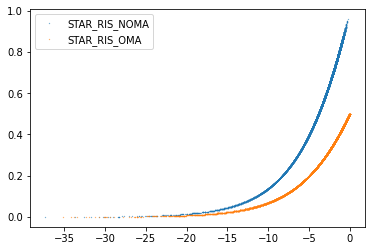

In [8]:
plt.plot(-df.loc[:, "SNR_STAR(dB)"].values, df.loc[:, "C_STAR"], ".", 
         label="STAR_RIS_NOMA", markersize=0.5)
plt.plot(-df.loc[:, "SNR_OMA(dB)"].values, df.loc[:, "C_OMA"], ".", 
         label="STAR_RIS_OMA", markersize=0.5)
plt.legend()
plt.show()

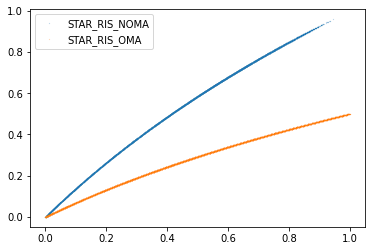

In [9]:
plt.plot(df.loc[:, "SNR_STAR"].values, df.loc[:, "C_STAR"], ".", 
         label="STAR_RIS_NOMA", markersize=0.2)
plt.plot(df.loc[:, "SNR_OMA"].values, df.loc[:, "C_OMA"], ".", 
         label="STAR_RIS_OMA", markersize=0.2)
plt.legend()
plt.show()

In [15]:
X = df.iloc[:, :-2].values
y = np.expand_dims(df["C_STAR"].values, -1)

In [16]:
# x_scl = MinMaxScaler()
# X = x_scl.fit_transform(X)

# y_scl = MinMaxScaler()
# y = y_scl.fit_transform(y)

In [17]:
y

array([[0.40756154],
       [0.59726739],
       [0.85780468],
       ...,
       [0.04997726],
       [0.63812136],
       [0.09843112]])

In [18]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

In [19]:
x_scl = MinMaxScaler()
X_train = x_scl.fit_transform(X_train)
X_val = x_scl.transform(X_val)  # Use transform here, not fit_transform

# Scale the output features
y_scl = MinMaxScaler()
y_train = y_scl.fit_transform(y_train)
y_val = y_scl.transform(y_val)  # Use transform here, not fit_transform

In [20]:
X_train.shape, X_val.shape

((9000, 6), (1000, 6))

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(6,)),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
], name="ece-model")
model.summary()

Model: "ece-model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 32)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,401 (9.38 KB)

 Trainable params: 2,401 (9.38 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=0.001))

In [32]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0560 - val_loss: 0.0341
Epoch 2/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0339 - val_loss: 0.0295
Epoch 3/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0300 - val_loss: 0.0258
Epoch 4/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0254 - val_loss: 0.0226
Epoch 5/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0225 - val_loss: 0.0198
Epoch 6/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0200 - val_loss: 0.0175
Epoch 7/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0177 - val_loss: 0.0154
Epoch 8/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0149 - val_loss: 0.0136
Epoch 9/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0133 - val_loss: 0.0121
Epoch 10/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0120 - val_loss: 0.0107
Epoch 11/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0106 - val_loss: 0.0095
Epoch 12/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

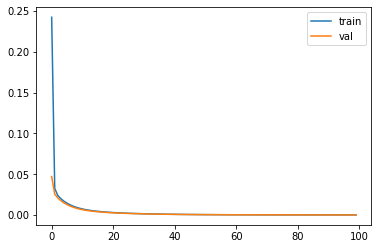

In [24]:
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="val")
plt.legend()
plt.show()

In [25]:
ypred = model.predict(x_scl.transform(X))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
mean_squared_error(y_scl.inverse_transform(y), y_scl.inverse_transform(ypred))

ValueError: y_true and y_pred have different number of output (1!=2)

In [89]:
mean_absolute_error(y_scl.inverse_transform(y), y_scl.inverse_transform(ypred))

0.07956969184116872

In [90]:
r2_score(y_scl.inverse_transform(y), y_scl.inverse_transform(ypred))

-1.360981629236266

In [105]:
ypred_scl = y_scl.inverse_transform(ypred)

In [104]:
# model.save('ece-model.keras')

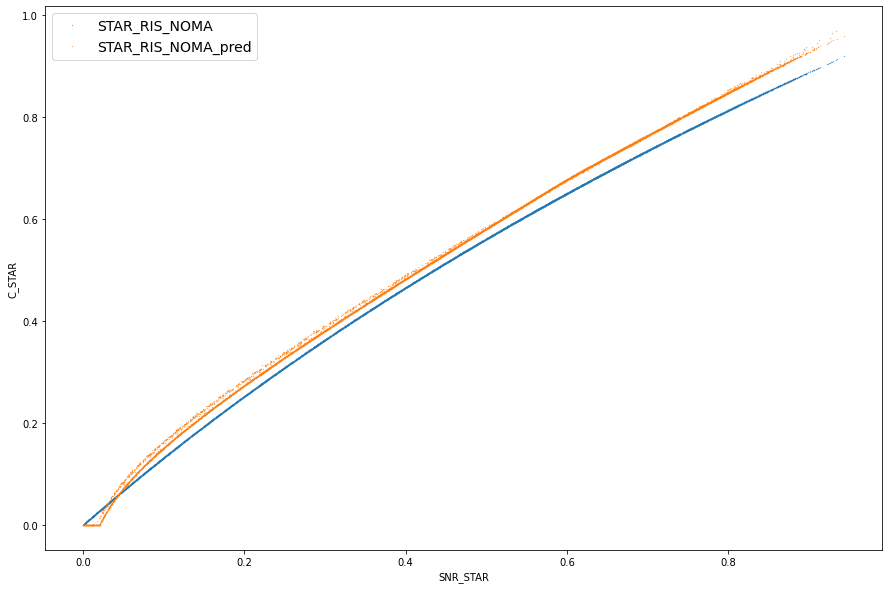

In [107]:
plt.figure(figsize=(15, 10))
plt.plot(df.loc[:, "SNR_STAR"].values, y_scl.inverse_transform(y)[:, 0], ".", 
         label="STAR_RIS_NOMA", markersize=0.5)
plt.plot(df.loc[:, "SNR_STAR"].values, np.where(ypred_scl[:, 0]<0, 0, ypred_scl[:, 0]), ".", 
         label="STAR_RIS_NOMA_pred", markersize=0.5)
plt.xlabel("SNR_STAR")
plt.ylabel("C_STAR")
plt.legend(fontsize=14)
plt.show()

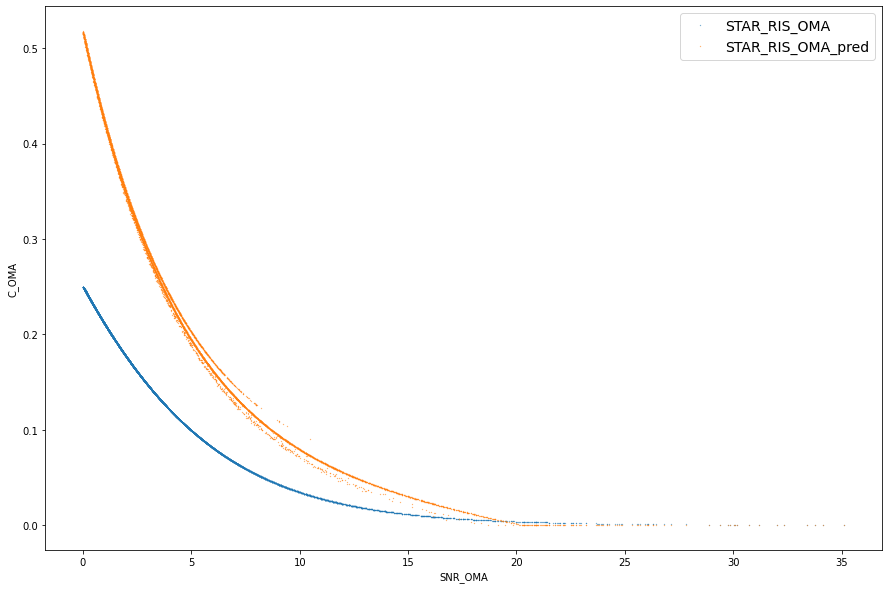

In [109]:
plt.figure(figsize=(15, 10))
plt.plot(df.loc[:, "SNR_OMA(dB)"].values, y_scl.inverse_transform(y)[:, 1], ".", 
         label="STAR_RIS_OMA", markersize=0.5)
plt.plot(df.loc[:, "SNR_OMA(dB)"].values, np.where(ypred_scl[:, 1]<0, 0, ypred_scl[:, 1]), ".", 
         label="STAR_RIS_OMA_pred", markersize=0.5)
plt.xlabel("SNR_OMA")
plt.ylabel("C_OMA")
plt.legend(fontsize=14)
plt.show()